## An End-to-End Machine Learning Project

In this notebook, we will go through an end-to-end example project, pretending to be a recently hired data scientist in a real estate company. Here are the main steps we will go through:

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune the model.
7. Present the solution.
8. Launch, monitor, and maintain the system.

### 1. Look at the big picture

For this project, we are asked to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Buearu publishes sample data (a block group typically has a population of 600 to 3000 people). The model should learn from this data and be able to predict the median housing price in any district, given all the other metrics. This model will be used as a factor to determine whether it is worth investing in a given area or not.

**Frame the problem**

1. Define the project objective.
2. How will the solution be used?
3. What are the current solutions?
4. What type of Machine Learning is needed?
5. How should performance be measured?


### 2. Get the data

In typical environments your data would be available in a relational database and spread across multiple tables/documents/files. To access it, you would first need to get your credentials and access authorizations. 

In this project, the data can be simply downloaded from 

"https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"

Extract *housing.csv* from the tgz file, then load the file as a pandas DataFrame.

### 3. Explore the data

1. Display the top five rows using the head() method. Learn the attributes in the data.
2. Get a quick description of the data using the info() method. Learn the total number of rows, each attribute's type, and number of non-null values.
3. Display the frequencies of categorial attributes using the value_counts() method.
4. Display a summary of numerical attributes using the describe() method.
5. Plot historgrams for each numerical attribute to get a feel of its distribution.

Have you noticed these things?
1. There are 207 missing values for attribute total_bedrooms.
1. The median income attribute does not look like it is expressed in US dollars.
2. The housing median age and the median house value are capped.
3. These attributes have very different scales.
4. Most attributes are right-skewed.

### Visualizing Geographical Data

Draw a scatter plot to indicate the geographcal location of the data.
- set x axis to be 'longitude'
- set y axis to be 'latitude'
- set size of dots to be proportional to its population
- set color to be proportional to its median house value
- adjust alpha to avoid blocking
- set x-label, y-label, and legend

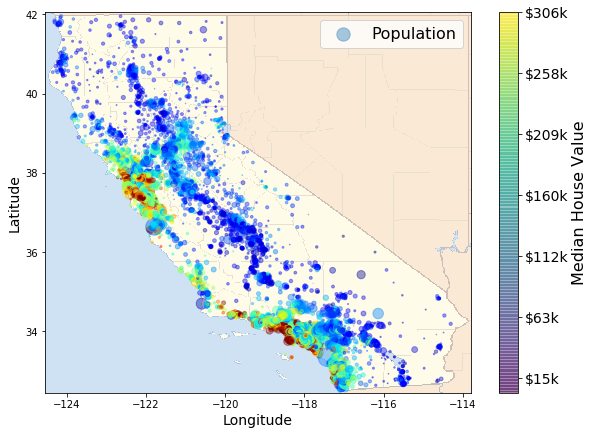

In [22]:
# scatter plot on California map
import matplotlib.image as mpimg
import numpy as np
california_img=mpimg.imread('Data/california.png')
ax = housing.plot(kind="scatter",
                  x="longitude",
                  y="latitude",
                  figsize=(10,7),
                  s=housing['population']/100,
                  label="Population",
                  c="median_house_value",
                  cmap=plt.get_cmap("jet"),
                  colorbar=False,
                  alpha=0.4)
plt.imshow(california_img,
           extent=[-124.55, -113.80, 32.45, 42.05],
           alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) \
                         for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Correlation between attributes

1. Use .corr() to display the standard correlation coefficient between median house value and each input feature.
2. Use pandas.plotting.scatter_matrix() to visualize the correlation.

- Correlation coefficient ranges from -1 to 1.
- When it is close to 1, it means that there is a strong positive correlation.
- When it is close to -1, it means that there is a strong negative correlation.
- When it is close to zero, it means that there is no *linear* correlation (other correlation may still exist

![Standard correlation coefficient of various datasets](Data/corr.jpg)

### Experimenting with combinations of attributes

Add the following attributes:
- rooms per household
- bedrooms per room
- population per household

Compute their correlation with median house value and display the scatter plot